In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df=pd.read_csv('../data/03-primas_bajas.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1064 non-null   int64  
 1   sex       1064 non-null   object 
 2   bmi       1064 non-null   float64
 3   children  1064 non-null   int64  
 4   smoker    1064 non-null   object 
 5   region    1064 non-null   object 
 6   charges   1064 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 66.5+ KB


# Pair Programming Correlación y covarianza

## Ana C y Ana G

### En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

---

#### - Pregunta teórica: ¿Qué diferencia existe entre la covarianza y la correlación?

        - La covariancia es más cualitativa, indica si existe o no relación entre las variables, y su tipo, que puede ser, directa, o indirecta.
        - Por el contrario, la correlación, a demás de indicar el tipo, informa de la dirección, y la fortaleza de la misma, es decir, como de  relacionadas están las dos variables

---

#### - Calculad la covarianza y la correlación de nuestro dataset. No nos vale solo con que la calculéis, debéis hacer una interpretación de los resultados obtenidos. 
#### - Calculad solo la correlación de Pearson.

In [12]:
df.cov()

/tmp/ipykernel_1077/1545644723.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,age,bmi,children,charges
age,195.399408,12.336599,0.730325,3.966002e+04
bmi,12.336599,35.596934,0.054021,-2.399192e+02
children,0.730325,0.054021,1.502556,8.620422e+02
charges,39660.016982,-239.919205,862.042187,2.223041e+07


Resultado

        - A mayor edad y número de hijos, existe relacion directa con el valor de la prima
        - Sin embargo la relación con bmi es negativa **nos parece extraño**, según aumenta el peso, la prima disminuye.Por lo que tendremos que hacer test complementarios.
        

# Correlación

In [13]:
df_corr=df.corr()
df_corr

/tmp/ipykernel_1077/2696228673.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr=df.corr()


,age,bmi,children,charges
age,1.000000,0.147920,0.042623,0.601752
bmi,0.147920,1.000000,0.007387,-0.008529
children,0.042623,0.007387,1.000000,0.149156
charges,0.601752,-0.008529,0.149156,1.000000


El ejercicio dice solo la de Pearson pero calculamso las tres para poder practicar y ver los diferentes resultados

In [14]:
# nos vamos a crear una lista con los nombres de las correlaciones que queremos ver:
correlaciones = ["pearson",  "spearman", "kendall"]

# iteramos por nuestra lista
for indice in correlaciones: 
    print(f"------- La correlación de {indice} es: ")
    print(df.corr(method = indice)) # calculamos la correlación.

------- La correlación de pearson es: 
               age       bmi  children   charges
age       1.000000  0.147920  0.042623  0.601752
bmi       0.147920  1.000000  0.007387 -0.008529
children  0.042623  0.007387  1.000000  0.149156
charges   0.601752 -0.008529  0.149156  1.000000
------- La correlación de spearman es: 
               age       bmi  children   charges
age       1.000000  0.142914  0.066986  0.707777
bmi       0.142914  1.000000  0.003416  0.010897
children  0.066986  0.003416  1.000000  0.166845
charges   0.707777  0.010897  0.166845  1.000000
------- La correlación de kendall es: 
               age       bmi  children   charges
age       1.000000  0.097787  0.050451  0.655907
bmi       0.097787  1.000000  0.002747  0.008969
children  0.050451  0.002747  1.000000  0.131157
charges   0.655907  0.008969  0.131157  1.000000


/tmp/ipykernel_1077/1619536098.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr(method = indice)) # calculamos la correlación.
/tmp/ipykernel_1077/1619536098.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr(method = indice)) # calculamos la correlación.
/tmp/ipykernel_1077/1619536098.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr(method = indice)) # calculamos la correlación.


Resultado:

En **Pearson** podemos ver que con respecto a charges: 
- **age** : tiene una correlación de **0.60**, las variables estan relacionadas. ( No alcanzan 0.75, por lo que no es una relación muy alta, pero si alta.)
- **bmi**: la correlación es de **- 0.008**,las variables están relacionadas negativamente, una aumenta y la otra disminuye, vemos un valor muy bajo. Aun así profundizaremos.
- **children** : la correlación es de **0.14**, las variables estan relacionadas positivamente, una aumenta y la otra también aunque el valor es muy bajo.

---

#### - Con los resultados de la correlación del ejercicio anterior, cread un heatmap.

In [15]:
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool));

/tmp/ipykernel_1077/478652150.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool));
/tmp/ipykernel_1077/478652150.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool));


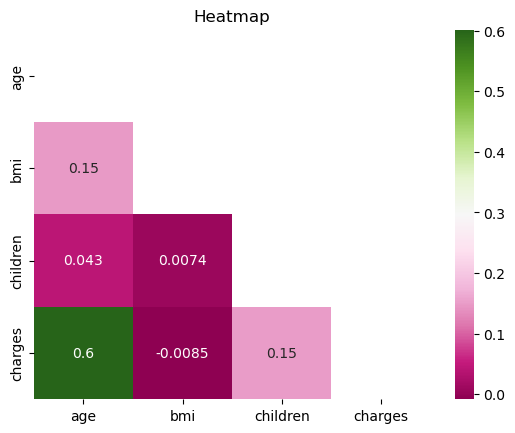

In [16]:
sns.heatmap(df_corr, # calculamos la correlación. En este caso, como no estamos especificando nada la correlación será la de Pearson.
            cmap = "PiYG",
            mask=mask, 
           annot = True); 
plt.title('Heatmap')
plt.savefig('../data/03-heatmap.png')#guardamos el heatmap

---

Profundizamos en la relacion negativa de bmi y charges: 

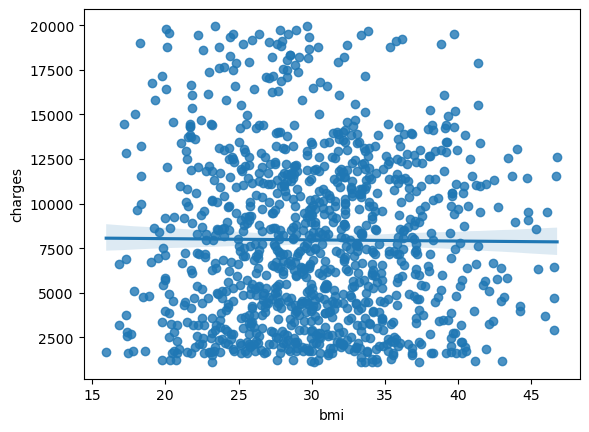

In [17]:
sns.regplot(data=df, x='bmi', y='charges');

Despues de profundizar en el análisis estadístico y visual de las variables bmi y charges, 

podemos decir que auqnue la covarianza sea negativa, las correlaciones de **Spearman** y **Kendall**, son casi 0 y positivas.
- **Spearman** casi 0 pero negativa. 
- Visualmente despues de ver el heatmap y el regplot, concluimos que no existe relación aparente.